# Ejemplo práctico T-SNE

## Importar librerias

T-SNE es un algoritmo de máquina de visualización, en lo cual su técnica de reducción es de forma no lineal apropiada para visualizar datos de alta cardinalidad en una baja cardinalidad de orden de 3 a 2 dimensiones.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE

%matplotlib notebook

sns.set(rc={'figure.figsize':(5,5)})
palette = sns.color_palette("bright", 12)

## Cargar archivo

http://sbcb.inf.ufrgs.br/carbm/static/cumida/Genes/Liver/GSE14520_U133A/Liver_GSE14520_U133A.csv

http://sbcb.inf.ufrgs.br/cumida

In [4]:
# Dataset de higene con cancer
df = pd.read_csv('Liver_GSE14520_U133A.csv', sep=',')
df.head()

samples type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0  GSM362958.CEL.gz  HCC   6.801198  4.553189  6.787790  5.430893   3.250222   
1  GSM362959.CEL.gz  HCC   7.585956  4.193540  3.763183  6.003593   3.309387   
2  GSM362960.CEL.gz  HCC   7.803370  4.134075  3.433113  5.395057   3.476944   
3  GSM362964.CEL.gz  HCC   6.920840  4.000651  3.754500  5.645297   3.387530   
4  GSM362965.CEL.gz  HCC   6.556480  4.599010  4.066155  6.344537   3.372081   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  6.272688  3.413405  3.374910  ...             10.735084   
1  6.291927  3.754777  3.587603  ...             11.528447   
2  5.825713  3.505036  3.687333  ...             10.892460   
3  6.470458  3.629249  3.577534  ...             10.686871   
4  5.439280  3.762213  3.440714  ...             11.014454   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0             10.398843            12.298551            12.270505   
1             11.369919            12.867048            12.560433   
2             10.416151            12.356337            11.888482   
3             10.524836            12.006596            11.846195   
4             10.775566            12.657182            12.573076   

   AFFX-ThrX-3_at  AFFX-ThrX-5_at  AFFX-ThrX-M_at  AFFX-TrpnX-3_at  \
0        3.855588        3.148321        3.366087         3.199008   
1        4.016561        3.282867        3.541994         3.548680   
2        3.839367        3.598851        3.516791         3.484089   
3        3.867602        3.180472        3.309547         3.425501   
4        4.091440        3.306729        3.493704         3.205771   

   AFFX-TrpnX-5_at  AFFX-TrpnX-M_at  
0         3.160388         3.366417  
1         3.460083         3.423348  
2         3.282626         3.512024  
3         3.166613         3.377499  
4         3.378567         3.392938  

[5 rows x 22279 columns]

## Preprocesamiento

In [5]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=22279)

In [9]:
# obtener las 25 columnas
new_df = df.iloc[:,0:25]
new_df.head()

samples type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0  GSM362958.CEL.gz  HCC   6.801198  4.553189  6.787790  5.430893   3.250222   
1  GSM362959.CEL.gz  HCC   7.585956  4.193540  3.763183  6.003593   3.309387   
2  GSM362960.CEL.gz  HCC   7.803370  4.134075  3.433113  5.395057   3.476944   
3  GSM362964.CEL.gz  HCC   6.920840  4.000651  3.754500  5.645297   3.387530   
4  GSM362965.CEL.gz  HCC   6.556480  4.599010  4.066155  6.344537   3.372081   

    1294_at   1316_at   1320_at  ...  1598_g_at  160020_at   1729_at  \
0  6.272688  3.413405  3.374910  ...   5.587355   4.506972  6.460804   
1  6.291927  3.754777  3.587603  ...   6.151642   4.230470  5.145329   
2  5.825713  3.505036  3.687333  ...   6.550241   4.099890  5.652887   
3  6.470458  3.629249  3.577534  ...   6.120514   4.407687  5.638350   
4  5.439280  3.762213  3.440714  ...   7.351418   4.191952  6.065578   

    1773_at    177_at    179_at   1861_at  200000_s_at  200001_at  200002_at  
0  3.363667  4.392159  5.565527  4.299101     7.696614   8.699359   8.721845  
1  3.663294  4.278429  6.129246  3.673436     6.946151   8.503353  10.454307  
2  3.489266  4.480860  6.046373  3.573462     7.432488   8.309845  10.216675  
3  3.395916  4.678811  6.143671  3.835955     8.114698   9.762388   9.780606  
4  3.816495  4.347108  5.901615  4.432728     7.746002   9.985891   9.514004  

[5 rows x 25 columns]

In [11]:
# descripción del data set
new_df.describe(include='all')

samples type   1007_s_at     1053_at      117_at      121_at  \
count                357  357  357.000000  357.000000  357.000000  357.000000   
unique               357    2         NaN         NaN         NaN         NaN   
top     GSM362958.CEL.gz  HCC         NaN         NaN         NaN         NaN   
freq                   1  181         NaN         NaN         NaN         NaN   
mean                 NaN  NaN    6.919697    4.364608    3.997815    5.676159   
std                  NaN  NaN    0.795479    0.517078    0.458061    0.324140   
min                  NaN  NaN    5.439881    3.208187    3.349685    4.843217   
25%                  NaN  NaN    6.458913    4.022586    3.756995    5.470514   
50%                  NaN  NaN    6.775267    4.246193    3.898834    5.663660   
75%                  NaN  NaN    7.141789    4.602921    4.125593    5.884673   
max                  NaN  NaN   10.203681    7.118403    8.451671    6.421155   

         1255_g_at     1294_at     1316_at     1320_at  ...   1598_g_at  \
count   357.000000  357.000000  357.000000  357.000000  ...  357.000000   
unique         NaN         NaN         NaN         NaN  ...         NaN   
top            NaN         NaN         NaN         NaN  ...         NaN   
freq           NaN         NaN         NaN         NaN  ...         NaN   
mean      3.196624    5.944732    3.784451    3.535687  ...    6.832364   
std       0.117558    0.460469    0.223318    0.146379  ...    0.782385   
min       2.926611    4.408074    3.213066    3.201922  ...    4.793881   
25%       3.113514    5.691971    3.650583    3.433129  ...    6.213477   
50%       3.183908    6.013986    3.767319    3.526540  ...    6.997482   
75%       3.269651    6.240367    3.905954    3.606105  ...    7.387599   
max       3.624480    7.321780    4.616552    4.123240  ...    9.132292   

         160020_at     1729_at     1773_at      177_at      179_at  \
count   357.000000  357.000000  357.000000  357.000000  357.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      4.462408    5.787162    3.511584    4.535671    6.043102   
std       0.263505    0.370469    0.200682    0.364463    0.366454   
min       3.875122    4.565975    3.085784    3.606414    4.739141   
25%       4.286979    5.575682    3.388439    4.279590    5.794236   
50%       4.435117    5.790562    3.489545    4.527913    6.040448   
75%       4.605688    5.988636    3.596372    4.756135    6.296387   
max       5.636600    7.404451    4.699673    5.966864    6.933219   

           1861_at  200000_s_at   200001_at   200002_at  
count   357.000000   357.000000  357.000000  357.000000  
unique         NaN          NaN         NaN         NaN  
top            NaN          NaN         NaN         NaN  
freq           NaN          NaN         NaN         NaN  
mean      4.109326     7.805849    8.521213    9.757799  
std       0.364562     0.496921    0.619415    0.484905  
min       3.203622     6.214050    5.434835    8.387430  
25%       3.843028     7.552767    8.177840    9.427234  
50%       4.053799     7.838915    8.558234    9.711492  
75%       4.299101     8.071466    8.883759   10.035394  
max       5.569150    10.242457   10.424737   11.350502  

[11 rows x 25 columns]

In [12]:
# sumar todos los valores nulos
new_df.isna().sum()

samples        0
type           0
1007_s_at      0
1053_at        0
117_at         0
121_at         0
1255_g_at      0
1294_at        0
1316_at        0
1320_at        0
1405_i_at      0
1431_at        0
1438_at        0
1487_at        0
1494_f_at      0
1598_g_at      0
160020_at      0
1729_at        0
1773_at        0
177_at         0
179_at         0
1861_at        0
200000_s_at    0
200001_at      0
200002_at      0
dtype: int64

In [13]:
# realizar el enconder de los datos categoricos tipo string a numericos

df_ = pd.DataFrame()

# selecionar las columnas tipo string
columns_ = new_df.select_dtypes(include = "object").columns
labelencoder = LabelEncoder()

# respaldar el dataframer
df_ = new_df.copy()
for col in columns_:
    df_[col] = labelencoder.fit_transform(df_[col])
    
df_.head()


samples  type  1007_s_at   1053_at    117_at    121_at  1255_g_at  \
0        0     0   6.801198  4.553189  6.787790  5.430893   3.250222   
1        1     0   7.585956  4.193540  3.763183  6.003593   3.309387   
2        2     0   7.803370  4.134075  3.433113  5.395057   3.476944   
3        6     0   6.920840  4.000651  3.754500  5.645297   3.387530   
4        7     0   6.556480  4.599010  4.066155  6.344537   3.372081   

    1294_at   1316_at   1320_at  ...  1598_g_at  160020_at   1729_at  \
0  6.272688  3.413405  3.374910  ...   5.587355   4.506972  6.460804   
1  6.291927  3.754777  3.587603  ...   6.151642   4.230470  5.145329   
2  5.825713  3.505036  3.687333  ...   6.550241   4.099890  5.652887   
3  6.470458  3.629249  3.577534  ...   6.120514   4.407687  5.638350   
4  5.439280  3.762213  3.440714  ...   7.351418   4.191952  6.065578   

    1773_at    177_at    179_at   1861_at  200000_s_at  200001_at  200002_at  
0  3.363667  4.392159  5.565527  4.299101     7.696614   8.699359   8.721845  
1  3.663294  4.278429  6.129246  3.673436     6.946151   8.503353  10.454307  
2  3.489266  4.480860  6.046373  3.573462     7.432488   8.309845  10.216675  
3  3.395916  4.678811  6.143671  3.835955     8.114698   9.762388   9.780606  
4  3.816495  4.347108  5.901615  4.432728     7.746002   9.985891   9.514004  

[5 rows x 25 columns]

In [14]:
# Se parar los datos, en una matriz de atributos
# vector de label y etiquetas
x = df_.iloc[:,2:24].values
y = df_.iloc[:,1].values

In [15]:
# normalizar la función de sk StandardScaler,
# realizado un fit_transform en los valores y atributos
x = StandardScaler().fit_transform(x)
x

array([[-1.49175051e-01,  3.65216563e-01,  6.09938288e+00, ...,
         5.21285019e-01, -2.20132067e-01,  2.88008257e-01],
       [ 8.38732664e-01, -3.31300234e-01, -5.12947811e-01, ...,
        -1.19733250e+00, -1.73247768e+00, -2.88740147e-02],
       [ 1.11242867e+00, -4.46463757e-01, -1.23453866e+00, ...,
        -1.47194793e+00, -7.52402266e-01, -3.41716926e-01],
       ...,
       [ 7.22919640e-01, -3.17381297e-01, -4.50980482e-01, ...,
        -6.38000758e-01,  1.04197381e+00,  4.79133826e-01],
       [-1.06325396e-01, -4.87658050e-01, -1.96550089e-01, ...,
         4.88311108e-03, -1.56075707e-01, -1.12566799e+00],
       [ 4.22279738e-01, -1.77827261e+00, -6.17581533e-01, ...,
        -9.44168958e-01,  4.35616388e-02, -6.53152908e-01]])

## T-SNE

In [49]:
# con el dataset ya depuerado, se debe difinir los parametros
# del algoritmo de t-sne
# 1.- n_components: numero de componente (dimensiones)
# 2.- perplexity: numeros de vecinos cercano para prendisaje
# 4.- n_iter: indica el numero de interacciones de la optimización
# 5.- learning_rate: escojer el numero de distancia en base a n_components
# si learning_rate es muy alto, los valores x son muy dispersos
# verbose mostrar el aprendisaje en pantalla
tsne = TSNE(n_components = 2,
            perplexity = 50,
            random_state=0,
            n_iter = 400,
            learning_rate = 200,
           verbose=2)
tsne_r = tsne.fit_transform(x)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 357 samples in 0.000s...
[t-SNE] Computed neighbors for 357 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 357 / 357
[t-SNE] Mean sigma: 1.789415
[t-SNE] Computed conditional probabilities in 0.020s
[t-SNE] Iteration 50: error = 62.1793823, gradient norm = 0.5148504 (50 iterations in 0.057s)
[t-SNE] Iteration 100: error = 64.8794861, gradient norm = 0.4630508 (50 iterations in 0.057s)
[t-SNE] Iteration 150: error = 65.1830215, gradient norm = 0.4954196 (50 iterations in 0.057s)
[t-SNE] Iteration 200: error = 64.8749695, gradient norm = 0.4983564 (50 iterations in 0.058s)
[t-SNE] Iteration 250: error = 70.3276596, gradient norm = 0.4436033 (50 iterations in 0.057s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.327660
[t-SNE] Iteration 300: error = 1.0624176, gradient norm = 0.0043490 (50 iterations in 0.050s)
[t-SNE] Iteration 350: error = 0.9487185, gradient norm = 0.0022685 

In [50]:
# almacenar el dataframe a uno nuevo
tsne_r = pd.DataFrame(tsne_r,columns=['tsne1','tsne2'])
tsne_r['type'] = df_['type'].astype(int)
tsne_r.head()

tsne1     tsne2  type
0  6.632957  4.669260     0
1 -5.798190  7.542868     0
2 -6.345364  7.147665     0
3 -3.222430 -3.224990     0
4  4.145998 -3.291745     0

## Visualización

<IPython.core.display.Javascript object>


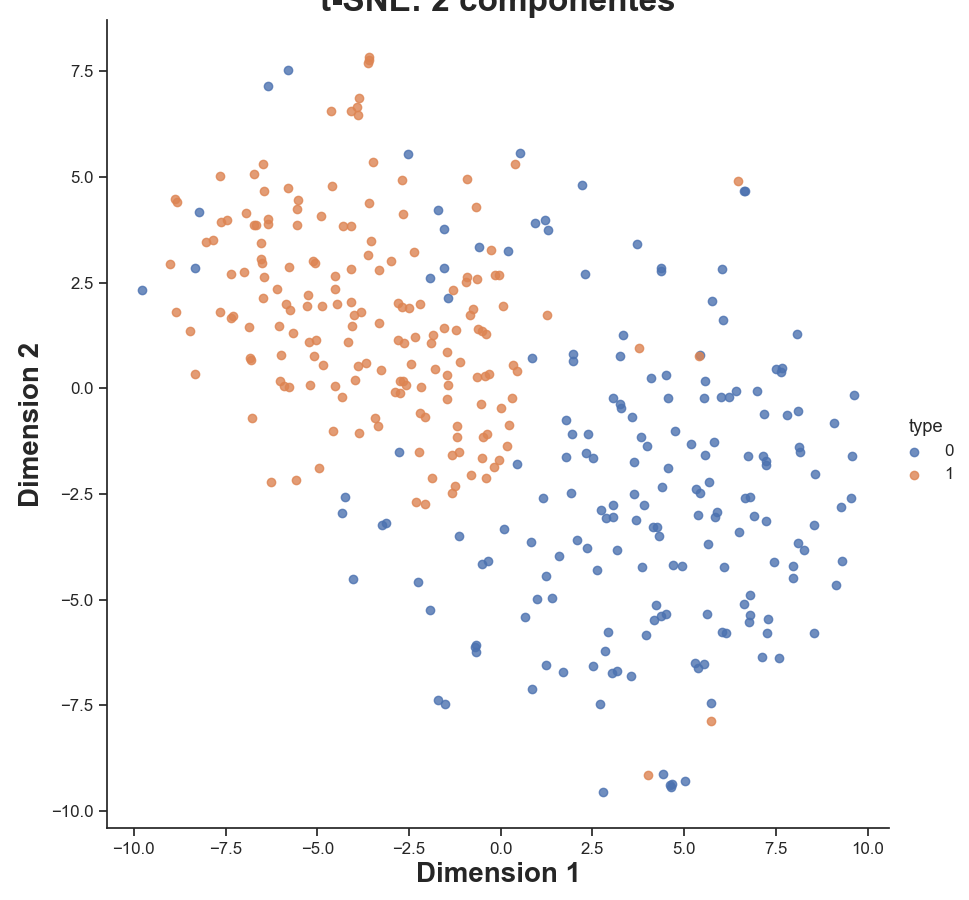

In [51]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='tsne1',
           y='tsne2',
           hue='type',
           data=tsne_r,
           fit_reg=False,
           legend=True,
           height=9)

plt.title('t-SNE: 2 componentes', weight='bold').set_fontsize('24')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('20')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('20')

# Tipo de cancer 1
# Tipo de cancer 2